<h2>Cleaning Data

<h3>New york city Airbnb

In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Set the path to the file you'd like to load
file_path = "AB_NYC_2019.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dgomonov/new-york-city-airbnb-open-data",
  file_path,
)

print("First 5 records:", df.head())

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2581/647901471.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1      

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<h4>Remove duplicates

In [12]:
print("\n🧾 Column Info and Data Types:")
print(df.info())

print("\n🔍 Summary Statistics (Numerical only):")
print(df.describe(include=[np.number]))

print("\n🔁 Duplicate Entries:")
print("Total duplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
print("After removing duplicates:", df.shape)



🧾 Column Info and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  l

<h4>Handle Missing Data

In [14]:
# Automatically identify text and label columns
potential_text_cols = [col for col in df.columns if df[col].dtype == "object" and df[col].str.len().mean() > 20]
potential_label_cols = [col for col in df.columns if df[col].nunique() <= 5 and df[col].dtype in ["object", "int", "category"]]

# Choose best guesses
text_col = potential_text_cols[0] if potential_text_cols else None
label_col = potential_label_cols[0] if potential_label_cols else None

print(f"📄 Detected text column: {text_col}")
print(f"🏷️ Detected label column: {label_col}")

if text_col is None or label_col is None:
    raise Exception("❌ Could not automatically detect text or label column. Please specify manually.")


📄 Detected text column: name
🏷️ Detected label column: neighbourhood_group


In [15]:
# Remove duplicates
print("\n🔁 Removing duplicates...")
df = df.drop_duplicates().reset_index(drop=True)

# Drop rows where text or label is missing
df = df.dropna(subset=[text_col, label_col])
print(f"✅ After dropping missing values: {df.shape}")

# Text Cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#[\w_]+", " ", text)       # URLs, mentions, hashtags
    text = re.sub(r"[^a-z\s]", "", text)                           # Remove punctuation, numbers
    text = re.sub(r"\s+", " ", text).strip()                       # Remove extra whitespace
    return " ".join([word for word in text.split() if word not in stop])

df["clean_text"] = df[text_col].apply(clean_text)

# Drop rows with empty clean text
df = df[df["clean_text"].str.strip() != ""]
print(f"✅ After cleaning empty texts: {df.shape}")



🔁 Removing duplicates...
✅ After dropping missing values: (48879, 16)
✅ After cleaning empty texts: (48752, 17)


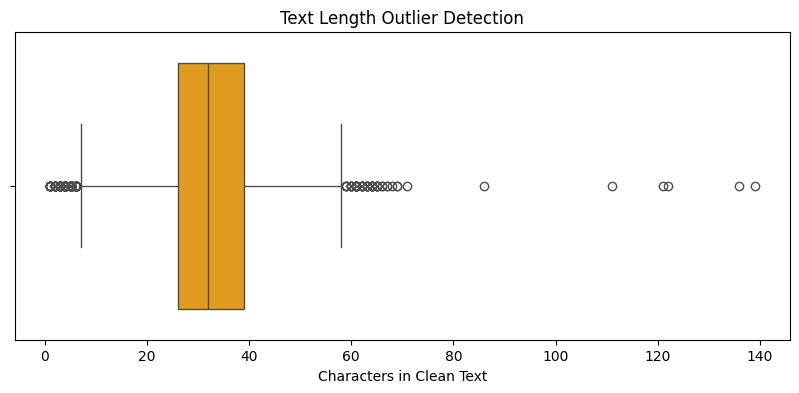

🚨 Removed 254 outlier rows based on text length.


In [16]:
# Add text length column
df["text_len"] = df["clean_text"].apply(len)

# Boxplot for outliers
plt.figure(figsize=(10,4))
sns.boxplot(x=df["text_len"], color='orange')
plt.title("Text Length Outlier Detection")
plt.xlabel("Characters in Clean Text")
plt.show()

# Outlier filtering using IQR
Q1 = df["text_len"].quantile(0.25)
Q3 = df["text_len"].quantile(0.75)
IQR = Q3 - Q1

before = df.shape[0]
df = df[(df["text_len"] >= Q1 - 1.5 * IQR) & (df["text_len"] <= Q3 + 1.5 * IQR)]
after = df.shape[0]

print(f"🚨 Removed {before - after} outlier rows based on text length.")


In [17]:
print("\n📌 Final Dataset Overview:")
print("Shape:", df.shape)
print("Sentiment Distribution:\n", df[label_col].value_counts())

# Optional save
df.to_csv("cleaned_sentiment_dataset.csv", index=False)



📌 Final Dataset Overview:
Shape: (48498, 18)
Sentiment Distribution:
 neighbourhood_group
Manhattan        21514
Brooklyn         20008
Queens            5534
Bronx             1072
Staten Island      370
Name: count, dtype: int64
